Design 4 chips for 4 different Lk (12, 24, 232, 61)pH/sq

In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
# from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [3]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


# 12pH/sq resonators


CPW

In [4]:
FeedlineWidth12 = 80
FeedlineLength12  = 6400
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 49.63979337993569 Ohm
Frequency of the feedline is 1.9844433669972186 GHz


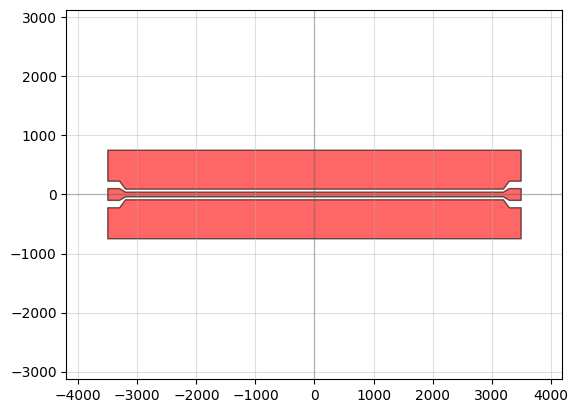

In [5]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
# TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\Tline-tests\20240527-SiRes-12pHsq-Tline-v1.gds")


Last Resonator (lowest freq)


Inductor total length is [1680.]
Resonator 1
 Geometric: 1.676005840115653 nH/m
 Kinetic: 33.599999999999994 nH/m
 Ltot: 35.27600584011566 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
The frequencies are [4.341482501032002]


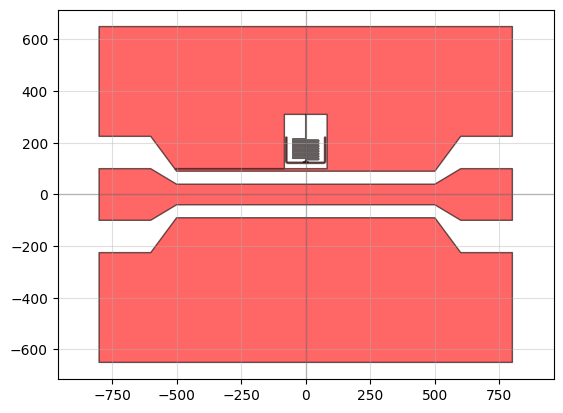

In [13]:
# Last resonator 12pH/sq, lowest frequency
SeparationTlineResonator12 = [10]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(1+NumberOfBends12)
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        


print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
# chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-LastRes-12pHsq_v1.gds")


First Resonator (higher freq)

Inductor total length is [501.]
Resonator 1
 Geometric: 0.5012249150423901 nH/m
 Kinetic: 10.019999999999998 nH/m
 Ltot: 10.52122491504239 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
The frequencies are [7.948403600791222]


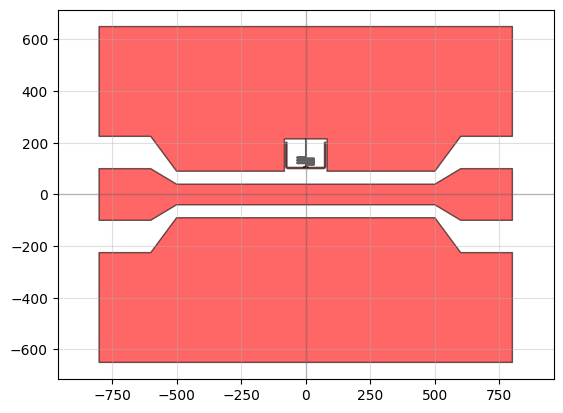

In [12]:
# 12pH/sq first resonator. Making the resonator shorter to increase the frequency
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
# chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-FirstRes-12pHsq_v1.gds")


Full chip

Resonator 1
 Geometric: 0.5012249150423901 nH/m
 Kinetic: 20.039999999999996 nH/m
 Ltot: 20.541224915042392 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 2
 Geometric: 0.53908893128733 nH/m
 Kinetic: 21.56 nH/m
 Ltot: 22.099088931287334 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 3
 Geometric: 0.5849243193733098 nH/m
 Kinetic: 23.400000000000002 nH/m
 Ltot: 23.98492431937331 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 4
 Geometric: 0.6506881370618893 nH/m
 Kinetic: 26.04 nH/m
 Ltot: 26.690688137061894 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20312982663676243 fF
Resonator 5
 Geometric: 0.7044948969889091 nH/m
 Kinetic: 28.2 nH/m
 Ltot: 28.90449489698891 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 6
 Geometric: 0.7842086153993085 nH/m
 Kinetic: 31.4 nH/m
 Ltot: 32.184208615399314 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
Resonator 7
 Geometric: 0.8639223338097081 nH/m
 Kinetic: 34.6 nH/m
 

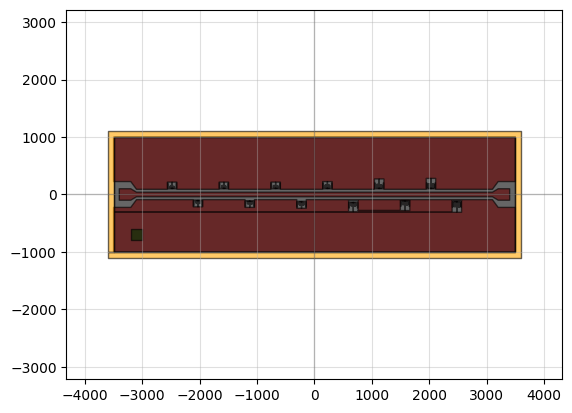

In [18]:
# We take as reference the first (v3) and last resonator (v2) and put resonators in between
# Fabrication version: We call it v0

# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5, 6, 7, 6, 7, 8, 9, 9, 10, 11, 12, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66, 62, 60, 78, 75, 75, 75, 82, 85, 90, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60] + [55,50,55] + [50]*3 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
# chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240514-SiRes-12pHsq-v1.gds")


Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Resonator 7
Resonator 8
Resonator 9
Resonator 10
Resonator 11
Resonator 12
Inductor total length is [ 501.  539.  585.  651.  705.  785.  865.  975. 1095. 1245. 1470. 1680.]
The frequencies are [5.68852793104255, 5.484359044345681, 5.2643394778823405, 4.990775971549864, 4.795461090188038, 4.545234981442487, 4.329319925145899, 4.078771893385308, 3.847895503046202, 3.6088183583040894, 3.3210403437984324, 3.1070180817204363]


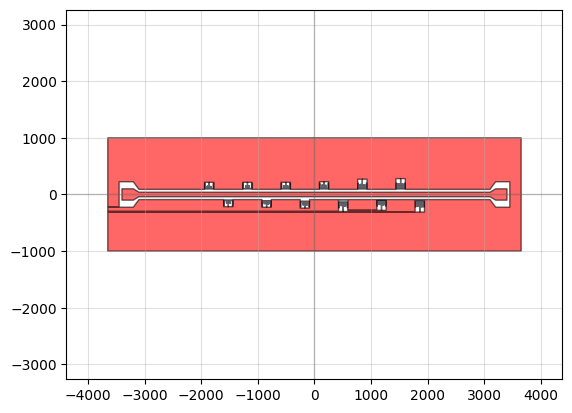

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240514-SiRes-12pHsq-v1-cap.gds'

In [7]:
# We take as reference the first (v3) and last resonator (v2) and put resonators in between
# Fabrication version: We call it v0

# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5, 6, 7, 6, 7, 8, 9, 9, 10, 11, 12, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66, 62, 60, 78, 75, 75, 75, 82, 85, 90, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60] + [55,50,55] + [50]*3 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, cap_sim=True)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240514-SiRes-12pHsq-v1-cap.gds")


# 24pH/sq resonators

CPW

In [23]:
FeedlineWidth24 = 50.1
FeedlineLength24  = 6400
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*FeedlineGap24/FeedlineWidth24

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.06035358042184 Ohm
Frequency of the feedline is 1.6197791984144365 GHz


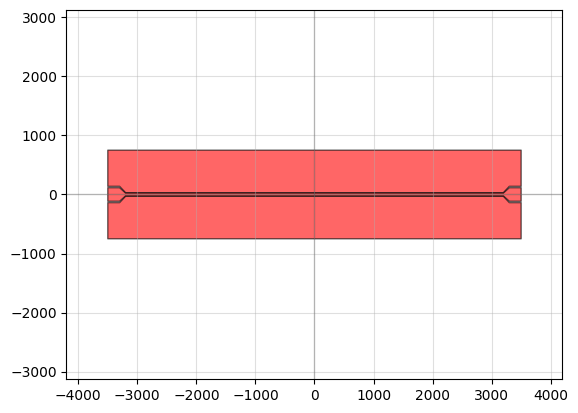

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240604-SiRes-24pHsq-Tline-v1.gds'

In [8]:
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, 1500]

_, _, TLine24 = ChipTline(ChipSize24,
                          FeedlineWidth24, 
                          FeedlineLength24, 
                          FeedlineGap24, 
                          FeedlineTaperLength24, 
                          BondpadWidth24, 
                          BondpadLength24, 
                          BondpadGap24)
qp(TLine24)
TLine24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-SiRes-24pHsq-Tline-v1.gds")


First Resonator (higher freq)

Resonator 1
 Lg: 9.226212586526513 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
The frequencies are [8.481366877497065]


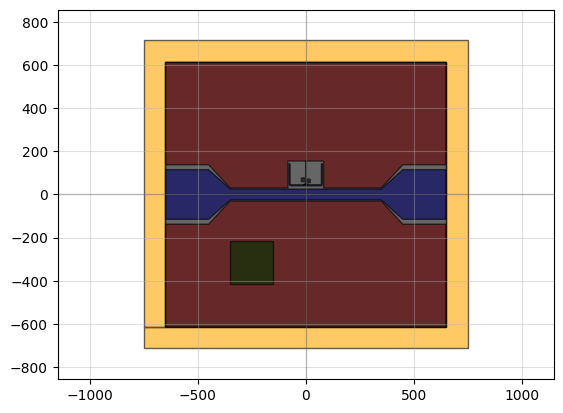

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240604-FirstRes-24pHsq_v1.gds'

In [28]:
SeparationTlineResonator24 = [0]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([70])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[10]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-FirstRes-24pHsq_v1.gds")


Last Resonator (lowest freq)

Resonator 1
The frequencies are [4.353561494801278]


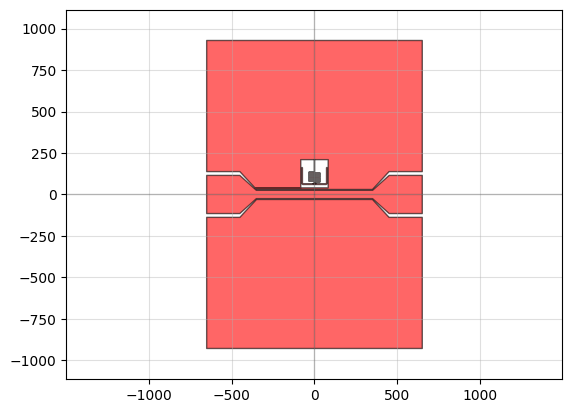

In [52]:
SeparationTlineResonator24 = [10]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[65] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[20]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-LastRes-24pHsq_v1.gds")


Full chip

 Geometric: 0.2262125865265119 nH/m
 Kinetic: 9.0 nH/m
 Ltot: 9.226212586526513 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
 Geometric: 0.24514459464898175 nH/m
 Kinetic: 9.76 nH/m
 Ltot: 10.005144594648982 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
 Geometric: 0.2700551316522316 nH/m
 Kinetic: 10.76 nH/m
 Ltot: 11.030055131652231 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
 Geometric: 0.3009441975362614 nH/m
 Kinetic: 11.999999999999998 nH/m
 Ltot: 12.300944197536262 nH
 Cg: 37.89856914206288 fF
 Cc: 0.24227969655882112 fF
 Geometric: 0.33482252786068123 nH/m
 Kinetic: 13.36 nH/m
 Ltot: 13.694822527860682 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
 Geometric: 0.37069370114536104 nH/m
 Kinetic: 14.799999999999999 nH/m
 Ltot: 15.17069370114536 nH
 Cg: 37.89856914206288 fF
 Cc: 0.22678032126622352 fF
 Geometric: 0.4205147751518607 nH/m
 Kinetic: 16.799999999999997 nH/m
 Ltot: 17.220514775151862 nH
 Cg: 37.89856914206288 fF
 Cc: 0.2681

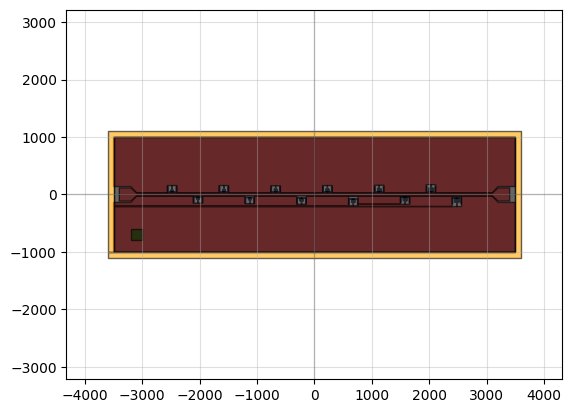

In [25]:
SeparationTlineResonator24 = [0]*7 + [5,0,10,0,10]
NumberOfResonators24 = 12

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3, 4, 4, 5, 6, 6,7,8,8,9,10,11]# 8, 9, 9, 10, 11, 12, 11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40, 36, 41, 40, 39, 45, 45, 45, 53, 55, 60, 65]
InductorEndLength24 = np.ones(NumberOfResonators24)*([70] + [60,65,55] + [50]*7 +[65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24
InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    # print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)

print('Inductor total length is', InductorTotalLength24)
print('The frequencies are', freqs)

FeedlineLength24  = 6200
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24 + 2*FinalSpacingBondpads24, 2000]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24)

qp(chip24)
# chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-SiRes-24pHsq-v1.gds")

# 24pH/sq resonators v2

Resonator 1
 Geometric: 0.26606944573171165 nH/m
 Kinetic: 441.6666666666667 nH/m
 Ltot: 441.9327361123984 nH
 Cg: 37.89856914206288 fF
 Cc: 0.2075155104511251 fF
The frequencies are [1.2264359749428277]


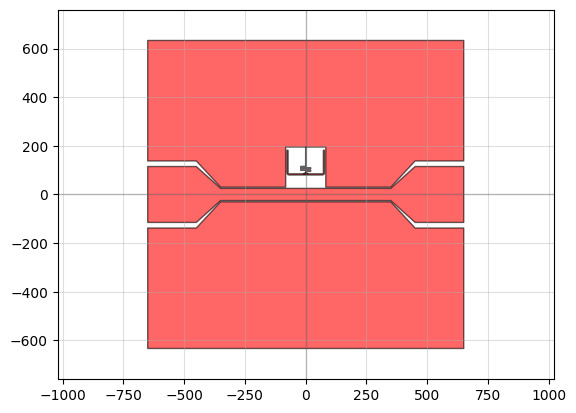

In [25]:
SeparationTlineResonator24 = [0]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([70])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*(1+NumberOfBends24)

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[50]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, 1000e-12,#Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
# chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240717-FirstRes-24pHsq_v2.gds")


Resonator 1
 Geometric: 0.8539581190084081 nH/m
 Kinetic: 34.199999999999996 nH/m
 Ltot: 35.05395811900841 nH
 Cg: 37.89856914206288 fF
 Cc: 0.2075155104511251 fF
The frequencies are [4.354661843232126]


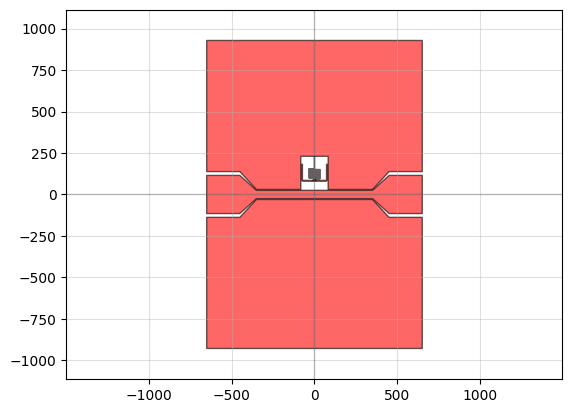

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240717-LastRes-24pHsq_v2.gds'

In [22]:
SeparationTlineResonator24 = [0]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[65] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[50]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240717-LastRes-24pHsq_v2.gds")


Inductor total length is [225. 244. 269. 300. 334. 370. 420. 470. 534. 610. 720. 855.]
The frequencies are [8.488114690599364, 8.151007316355374, 7.763081151572205, 7.3511239144800875, 6.966983201787202, 6.619424723491647, 6.212979245057589, 5.873247815409577, 5.510098358395594, 5.1554615913651505, 4.745357119316126, 4.354661843232126]


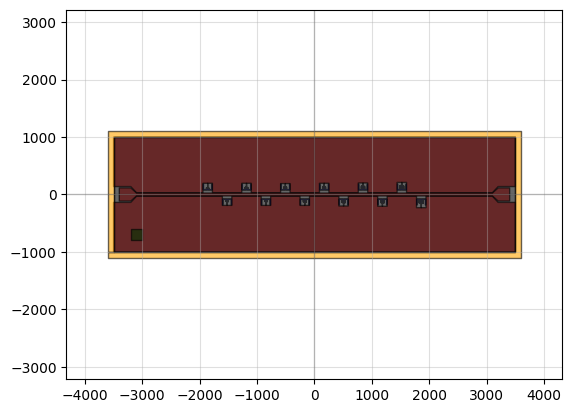

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240717-SiRes-24pHsq-v2.gds'

In [18]:
SeparationTlineResonator24 = [0]*12
NumberOfResonators24 = 12

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3, 4, 4, 5, 6, 6,7,8,8,9,10,11]# 8, 9, 9, 10, 11, 12, 11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40, 36, 41, 40, 39, 45, 45, 45, 53, 55, 60, 65]
InductorEndLength24 = np.ones(NumberOfResonators24)*([70] + [60,65,55] + [50]*7 +[65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24
InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*50
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    # print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)

print('Inductor total length is', InductorTotalLength24)
print('The frequencies are', freqs)

FeedlineLength24  = 6200
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24 + 2*FinalSpacingBondpads24, 2000]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240717-SiRes-24pHsq-v2.gds")

# 61pH/sq resonators

CPW

In [5]:
# 61pH/sq on Ge!!
FeedlineWidth61 = 87
FeedlineLength61  = 6400
FeedlineGap61 = 5
FeedlineTaperLength61 =  100
BondpadWidth61 =  184
BondpadLength61 = 200
BondpadGap61 = BondpadWidth61*FeedlineGap61/FeedlineWidth61

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61, length_CPW=(FeedlineLength61 + FeedlineTaperLength61 + BondpadLength61)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.08723025799379 Ohm
Frequency of the feedline is 1.2894756943789032 GHz


In [26]:
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, 2000]

_, _, TLine61 = ChipTline(ChipSize61,
                            FeedlineWidth61, 
                            FeedlineLength61, 
                            FeedlineGap61, 
                            FeedlineTaperLength61, 
                            BondpadWidth61, 
                            BondpadLength61, 
                            BondpadGap61)

qp(TLine61)
TLine61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240610-GeRes-61pHsq\20240610-GeRes-61pHsq-Tline-v1.gds")


NameError: name 'FeedlineLength61' is not defined

First Resonator (higher freq)

Resonator 1
 Geometric: 0.28979252349092943 nH/m
 Kinetic: 9.516 nH/m
 Ltot: 9.805792523490931 nH
 Cg: 33.16110861767758 fF
 Cc: 0.5000922138110998 fF
The frequencies are [8.76019914732686]


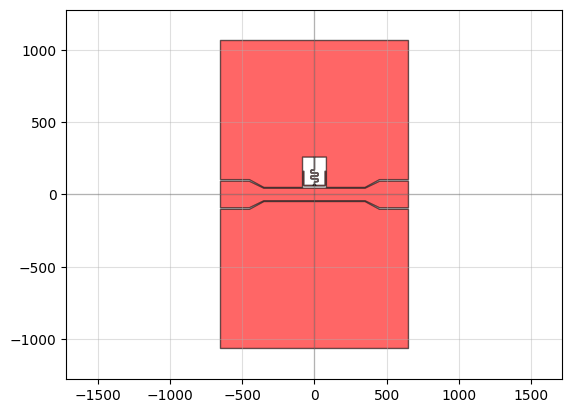

In [30]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[3]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Ge, thickness_subs_Ge)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
# chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240610-GeRes-61pHsq\20240610-FirstRes-61pHsq_v1.gds")





Last Resonator (Lowest frequency)

Resonator 1
The frequencies are [4.826592832829205]


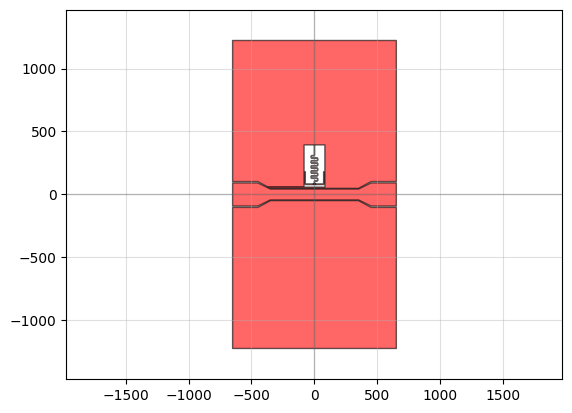

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240610-GeRes-61pHsq\\20240610-LastRes-61pHsq_v1.gds'

In [24]:
SeparationTlineResonator61 = [10]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[8]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([65])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*NumberOfBends61

InductorWidth61 = np.ones(NumberOfResonators61)*1.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[20]
TaperLength61 = np.ones(NumberOfResonators61)*5

FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Ge, thickness_subs_Ge)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240610-GeRes-61pHsq\20240610-LastRes-61pHsq_v1.gds")

Full chip

Inductor total length is [340. 372. 409. 450. 496. 562. 634. 390. 455. 520. 599. 705.]
The frequencies are [9.382116323396838, 8.969595019554596, 8.554340391040839, 8.160358092321191, 7.768088773556336, 7.304794146950198, 6.870959449244872, 6.490911518507509, 6.003526637750544, 5.617313166584366, 5.232435298543548, 4.826592832829205]


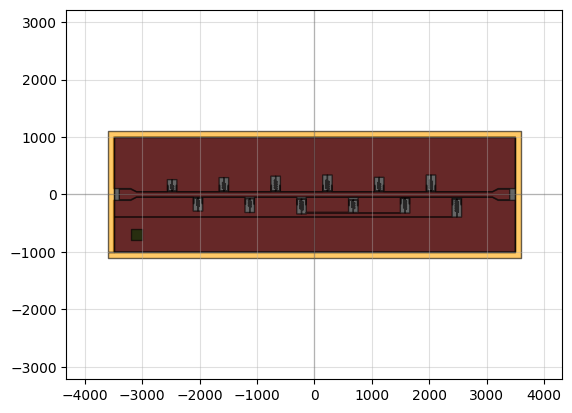

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240610-GeRes-61pHsq\\20240610-GeRes-61pHsq-v1.gds'

In [63]:
SeparationTlineResonator61 = [0]*7 + [5,0,10,0,10]
NumberOfResonators61 = 12

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[3, 4, 4, 5, 6, 6,7,4,5,6,7,8]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50, 38, 46, 43, 41, 52, 52, 45, 45, 45, 47, 50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50] + [60,65,55] + [50]*7 +[65])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*NumberOfBends61
InductorWidth61 = np.ones(NumberOfResonators61)*([2.5]*7 + [1.5]*5)
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    # print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Ge, thickness_subs_Ge)/1e9)
    
print('Inductor total length is', InductorTotalLength61)
print('The frequencies are', freqs)

FeedlineLength61  = 6200
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61 + 2*FinalSpacingBondpads61, 2000]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61, 
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240610-GeRes-61pHsq\20240610-GeRes-61pHsq-v1.gds")

# 232pH/sq

CPW

In [ ]:
# 232pH/sq
FeedlineWidth232 = 330
FeedlineLength232  = 6200
FeedlineGap232 = 5
FeedlineTaperLength232 =  100
BondpadWidth232 =  450
BondpadLength232 = 100
BondpadGap232 = BondpadWidth232*FeedlineGap232/FeedlineWidth232

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232, length_CPW=(FeedlineLength232 + FeedlineTaperLength232 + BondpadLength232)*1e-6)/1e9, 'GHz')

# 12pH/sq with extra bands above and below 4-8

1GHz band (3) ; 4-8 band (7) ; 11 GHz (2)

1GHz band

Inductor total length is [3260.]
Resonator 1
The frequencies are [1.9841652633607525]


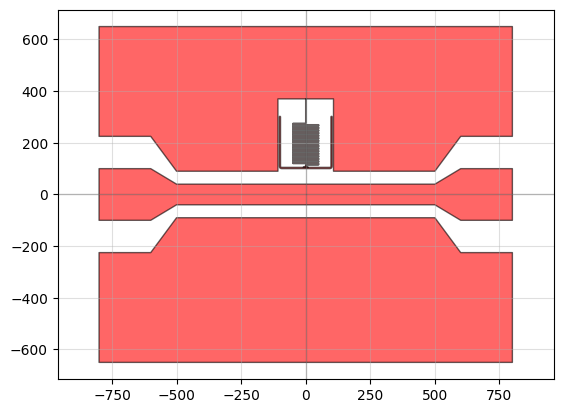

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-SiRes-1GHz-12pHsq_v1-closer.gds'

In [24]:
# 1GHz 12pH/sq
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*200
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*200
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[30]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.5
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        


print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240708-GeRes-12pHsq\20240422-SiRes-1GHz-12pHsq_v1-closer.gds")


11GHz

Inductor total length is [232.]
Resonator 1
The frequencies are [12.307017011439514]


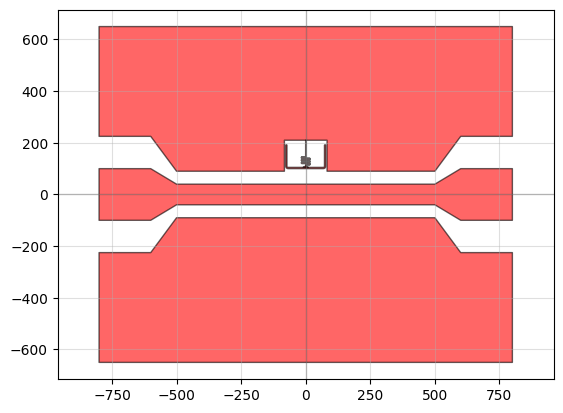

In [30]:
# 12pH/sq first resonator. Making the resonator shorter to increase the frequency
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*90
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[4]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[30] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)

# chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240708-GeRes-12pHsq\20240422-GeRes-11GHz-12pHsq_v1-1.gds")

Full chip

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Resonator 7
Resonator 8
Resonator 9
Resonator 10
Resonator 11
Resonator 12
Inductor total length is [ 208.  220.  232.  435.  465.  573.  710.  920. 1155. 1580. 3260. 3785.]
The frequencies are [12.334128034828002, 11.99317716705336, 11.679022668117533, 8.52997635913335, 8.250287330323037, 7.43235929647938, 6.678002126869871, 5.867139654575304, 5.23559761366402, 4.476755400055545, 1.9841652633607525, 1.8414268096026898]


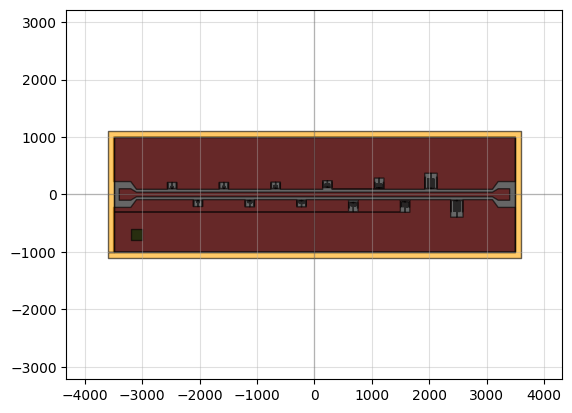

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240708-SiRes-12pHsq-v1-several-bands.gds'

In [44]:

SeparationTlineResonator12 = [0]*7 + [5,10,10, 0,0]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*([150]*10 + [200]*2)
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*([100]*10 + [200]*2)
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[4, 4,4,5, 6, 6, 8, 9, 11, 14, 30, 35]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[27,30,33,66, 60, 78, 75, 85, 90, 100, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60, 60, 60, 60] + [55,55] + [50]*1 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = np.ones(NumberOfResonators12)*([0.6]*10 + [0.5]*2)
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,10,10,10,30,40,10,20, 10, 10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240708-GeRes-12pHsq\20240708-GeRes-12pHsq-v1.gds")


# Pt annealed test

Resonators in groups of different number, in a wide range. We assume Lk=61pH to start with (probably higher)

1GHz

Resonator 1
 Geometric: 1.1977235296532558 nH/m
 Kinetic: 122.0 nH/m
 Ltot: 123.19772352965325 nH
 Cg: 75.79713828412577 fF
 Cc: 0.27259213935007715 fF
The frequencies are [1.6440417857380656]


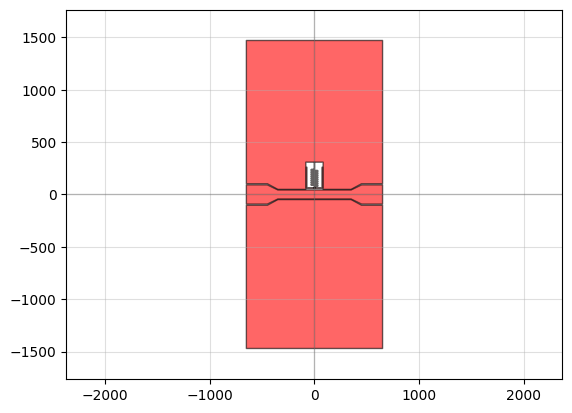

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-1GHz-Pt-61pHsq_v1.gds'

In [47]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*200
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[15]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*10
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[60]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*0.6
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-1GHz-Pt-61pHsq_v1.gds")





4GHz band

Resonator 1
 Geometric: 0.3906221307479609 nH/m
 Kinetic: 39.65 nH/m
 Ltot: 40.040622130747956 nH
 Cg: 37.89856914206288 fF
 Cc: 0.27259213935007715 fF
The frequencies are [4.071008760439421]


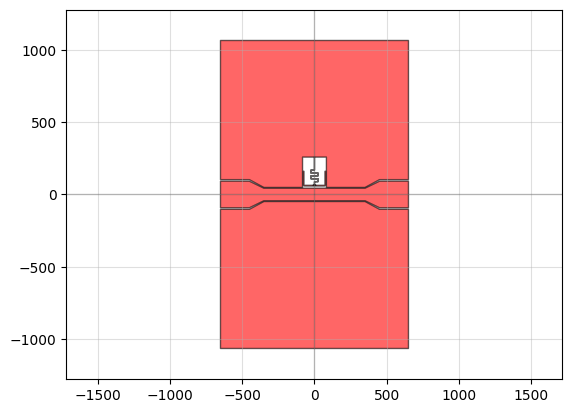

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-4GHz-Pt-61pHsq_v1.gds'

In [48]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[3]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*0.6
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-4GHz-Pt-61pHsq_v1.gds")





Resonator 1
0.477064398527492
 Geometric: 0.35076527154276116 nH/m
 Kinetic: 35.583333333333336 nH/m
 Ltot: 35.9340986048761 nH
 Cg: 37.89856914206288 fF
 Cc: 0.415180129996731 fF
The frequencies are [4.2893296800547285]


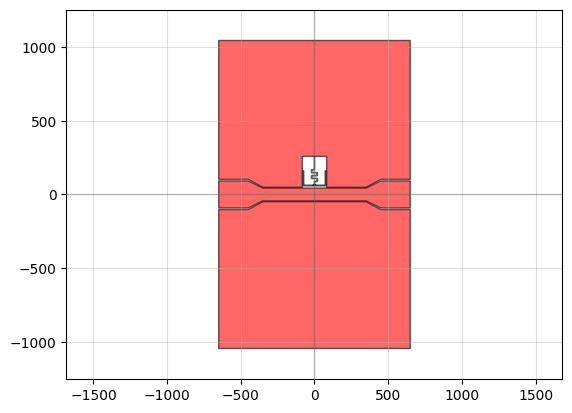

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-4p3GHz-Pt-61pHsq_v1.gds'

In [13]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[3]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[40]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*0.6
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-4p3GHz-Pt-61pHsq_v1.gds")





8GHz band

Resonator 1
 Geometric: 0.3931580095768661 nH/m
 Kinetic: 12.932 nH/m
 Ltot: 13.325158009576866 nH
 Cg: 27.375420034246684 fF
 Cc: 0.3544484011799056 fF
The frequencies are [8.279613105789688]


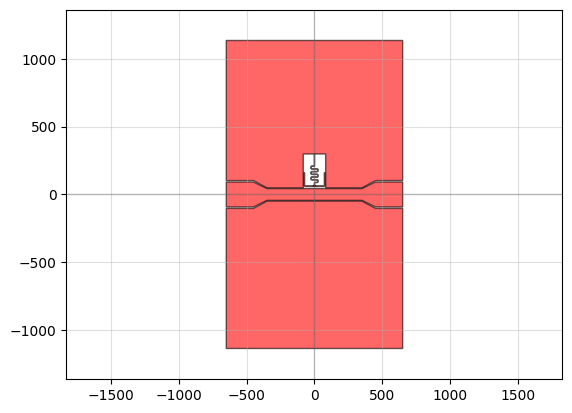

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-8GHz-Pt-61pHsq_v1.gds'

In [49]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[5]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-8GHz-Pt-61pHsq_v1.gds")





Resonator 1
0.6201808244663835
 Geometric: 0.3488585155400361 nH/m
 Kinetic: 11.468 nH/m
 Ltot: 11.816858515540035 nH
 Cg: 27.375420034246687 fF
 Cc: 0.44134943718908787 fF
The frequencies are [8.778408123975327]


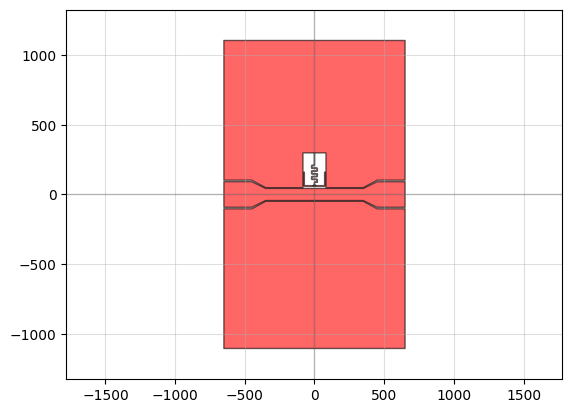

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-8GHz-Pt-61pHsq_v1-1.gds'

In [10]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[5]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[40]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-8GHz-Pt-61pHsq_v1-1.gds")





Resonator 1
0.6201808244663835
 Geometric: 0.30455902150320613 nH/m
 Kinetic: 10.004 nH/m
 Ltot: 10.308559021503205 nH
 Cg: 27.375420034246687 fF
 Cc: 0.44134943718908787 fF
The frequencies are [9.398700381144334]


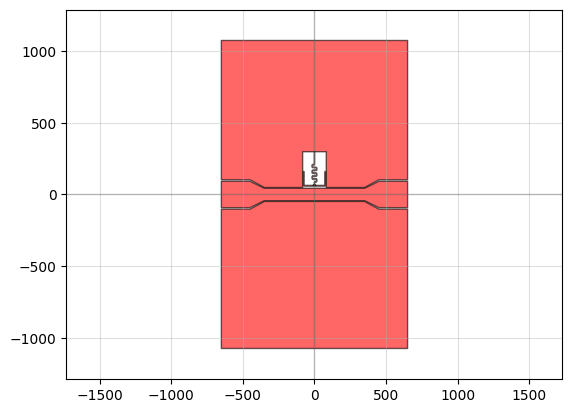

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-8GHz-Pt-61pHsq_v1-2.gds'

In [14]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[5]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[30]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-8GHz-Pt-61pHsq_v1-2.gds")





12GHz band

Resonator 1
0.6653174458110577
 Geometric: 0.23143885501583444 nH/m
 Kinetic: 5.838571428571428 nH/m
 Ltot: 6.070010283587263 nH
 Cg: 13.843048267085614 fF
 Cc: 0.4534188390113482 fF
The frequencies are [17.08484541177726]


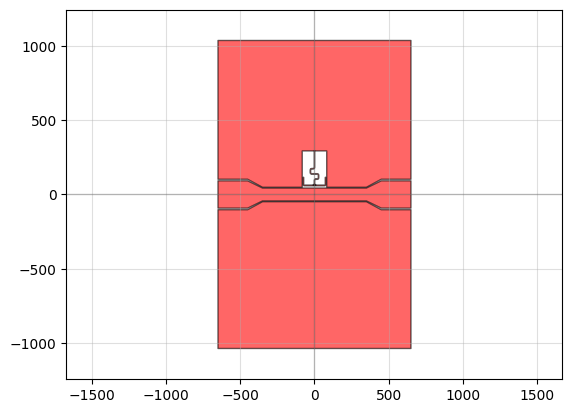

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-12GHz-Pt-61pHsq_v1.gds'

In [60]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*55
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*35
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[55]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*3.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-12GHz-Pt-61pHsq_v1.gds")




Resonator 1
0.6653174458110577
 Geometric: 0.19032462466513103 nH/m
 Kinetic: 4.792857142857142 nH/m
 Ltot: 4.983181767522273 nH
 Cg: 13.843048267085614 fF
 Cc: 0.4534188390113482 fF
The frequencies are [18.856123002718046]


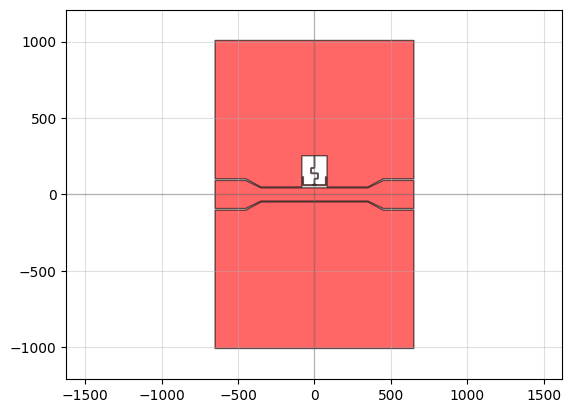

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-12GHz-Pt-61pHsq_v1-1.gds'

In [18]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*55
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*35
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[45]
InductorEndLength61 = np.ones(NumberOfResonators61)*([10])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*3.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-12GHz-Pt-61pHsq_v1-1.gds")




Resonator 1
0.6653174458110577
 Geometric: 0.16976750948977937 nH/m
 Kinetic: 4.27 nH/m
 Ltot: 4.43976750948978 nH
 Cg: 13.843048267085614 fF
 Cc: 0.4534188390113482 fF
The frequencies are [19.976787625460464]


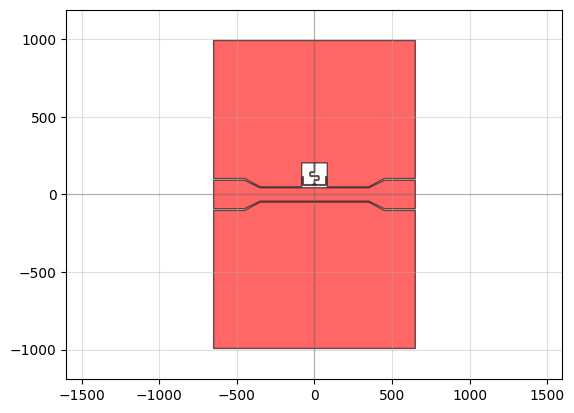

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-12GHz-Pt-61pHsq_v1-2.gds'

In [19]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*55
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*25
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[55]
InductorEndLength61 = np.ones(NumberOfResonators61)*([10])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*3.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-12GHz-Pt-61pHsq_v1-2.gds")




17GHz band

Resonator 1
0.6201808244663835
 Geometric: 0.06091180430064122 nH/m
 Kinetic: 1.9519999999999997 nH/m
 Ltot: 2.012911804300641 nH
 Cg: 10.950168013698676 fF
 Cc: 0.44134943718908787 fF
The frequencies are [33.23662892628157]


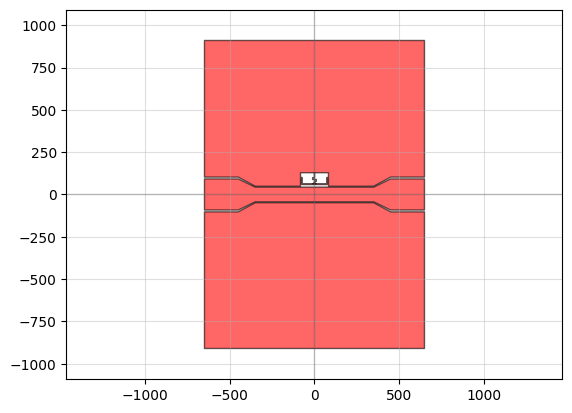

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-17GHz-Pt-61pHsq_v1.gds'

In [43]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*40
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[0]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*10
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[20]
InductorEndLength61 = np.ones(NumberOfResonators61)*([20])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-17GHz-Pt-61pHsq_v1.gds")





Resonator 1
0.6201808244663835
 Geometric: 0.09044480032519454 nH/m
 Kinetic: 2.928 nH/m
 Ltot: 3.0184448003251947 nH
 Cg: 5.475084006849338 fF
 Cc: 0.44134943718908787 fF
The frequencies are [37.66157870552947]
inductor


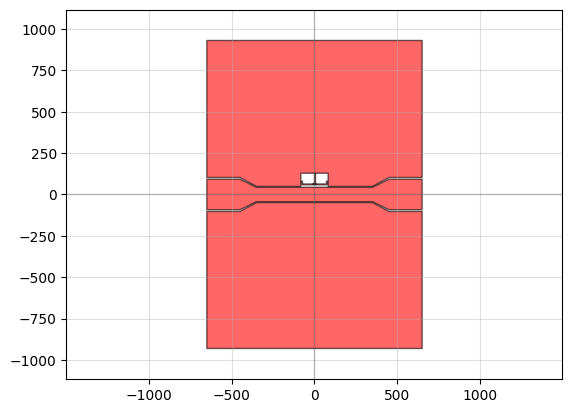

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-17GHz-Pt-61pHsq_v1-1.gds'

In [92]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*20
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[-1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*30
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[55]
InductorEndLength61 = np.ones(NumberOfResonators61)*([30])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-17GHz-Pt-61pHsq_v1-1.gds")





30GHz

Resonator 1
0.6201808244663835
 Geometric: 0.06829505330677955 nH/m
 Kinetic: 2.1959999999999997 nH/m
 Ltot: 2.2642950533067796 nH
 Cg: 5.475084006849338 fF
 Cc: 0.44134943718908787 fF
The frequencies are [43.483413668879976]


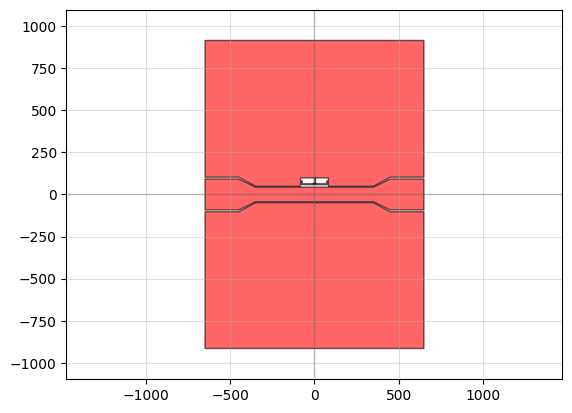

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-30GHz-Pt-61pHsq_v1.gds'

In [26]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*20
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[-1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*30
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[55]
InductorEndLength61 = np.ones(NumberOfResonators61)*([0])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-30GHz-Pt-61pHsq_v1.gds")





Chip

Resonator 1
0.477064398527492
 Geometric: 1.1977235296532558 nH/m
 Kinetic: 122.0 nH/m
 Ltot: 123.19772352965325 nH
 Cg: 75.79713828412577 fF
 Cc: 0.415180129996731 fF
Resonator 2
0.477064398527492
 Geometric: 0.3906221307479609 nH/m
 Kinetic: 39.65 nH/m
 Ltot: 40.040622130747956 nH
 Cg: 37.89856914206288 fF
 Cc: 0.415180129996731 fF
Resonator 3
0.477064398527492
 Geometric: 0.35076527154276116 nH/m
 Kinetic: 35.583333333333336 nH/m
 Ltot: 35.9340986048761 nH
 Cg: 37.89856914206288 fF
 Cc: 0.415180129996731 fF
Resonator 4
0.6201808244663835
 Geometric: 0.3931580095768661 nH/m
 Kinetic: 12.932 nH/m
 Ltot: 13.325158009576866 nH
 Cg: 27.375420034246687 fF
 Cc: 0.44134943718908787 fF
Resonator 5
0.6201808244663835
 Geometric: 0.3488585155400361 nH/m
 Kinetic: 11.468 nH/m
 Ltot: 11.816858515540035 nH
 Cg: 27.375420034246687 fF
 Cc: 0.44134943718908787 fF
Resonator 6
0.6201808244663835
 Geometric: 0.30455902150320613 nH/m
 Kinetic: 10.004 nH/m
 Ltot: 10.308559021503205 nH
 Cg: 27.37542003424

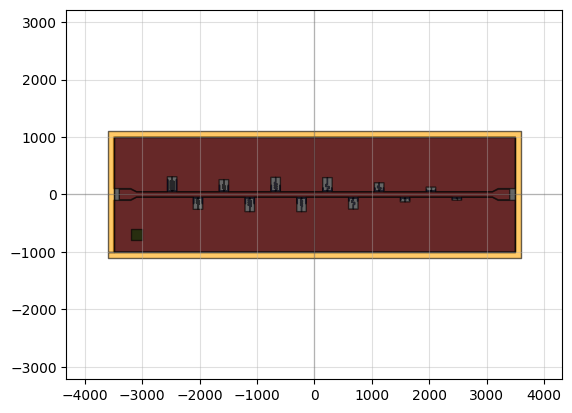

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240717-GeRes-Pt-61pHsq\\20240717-GeRes-Pt-61pHsq_v1.gds'

In [17]:
NumberOfResonators61 = 12
SeparationTlineResonator61 = [0]*np.ones(NumberOfResonators61)
#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150 
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*[200, 100, 100, 100, 100, 100, 55, 55, 55, 40,20, 20]   
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[15, 3, 3, 5, 5, 5, 1, 1, 1, 0, -1, -1]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*[10, 20, 20, 20, 20, 20, 35, 35,  25, 10, 30, 30]
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[60, 50, 40, 50, 40, 30, 55, 45, 55, 20, 55, 55  ]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50, 50, 50, 50, 50, 50, 50, 10 , 10, 20, 30, 0 ])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*(1+NumberOfBends61)

InductorWidth61 = np.ones(NumberOfResonators61)*[0.6, 0.6, 0.6, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 2.5, 2.5, 2.5]  
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
SpacingCc61 = np.ones(NumberOfResonators61)*10
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)
    
print('The frequencies are', freqs)



FeedlineWidth61 = 87
FeedlineLength61  = 6200
FeedlineGap61 = 5
FeedlineTaperLength61 =  100
BondpadWidth61 =  184
BondpadLength61 = 200
BondpadGap61 = BondpadWidth61*FeedlineGap61/FeedlineWidth61

ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61 + 2*FinalSpacingBondpads61, 2000]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=False)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-GeRes-Pt-61pHsq_v1.gds")





# NbTiN 24pHsq 4x4

Impedance of the feedline is 50.06035358042184 Ohm
Frequency of the feedline is 3.1007201798219213 GHz


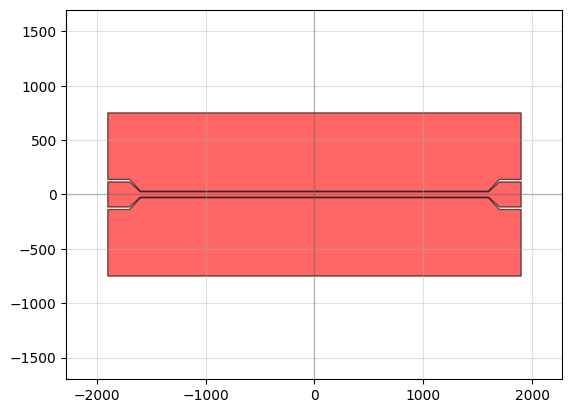

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20250107-SiRes-24pHsq\\Tline.gds'

In [24]:
FeedlineWidth24 = 50.1
FeedlineLength24  = 3200
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*FeedlineGap24/FeedlineWidth24
FinalSpacingBondpads24 = 100

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')

ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24 , 1500]

_, _, TLine24 = ChipTline(ChipSize24,
                          FeedlineWidth24, 
                          FeedlineLength24, 
                          FeedlineGap24, 
                          FeedlineTaperLength24, 
                          BondpadWidth24, 
                          BondpadLength24, 
                          BondpadGap24)
qp(TLine24)
TLine24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20250107-SiRes-24pHsq\Tline.gds")


Inductor total length is [225. 269. 334. 420. 534. 720. 855.]
The frequencies are [8.488114690599364, 7.763081151572205, 6.966983201787202, 6.212979245057589, 5.510098358395594, 4.745357119316126, 4.354661843232126]


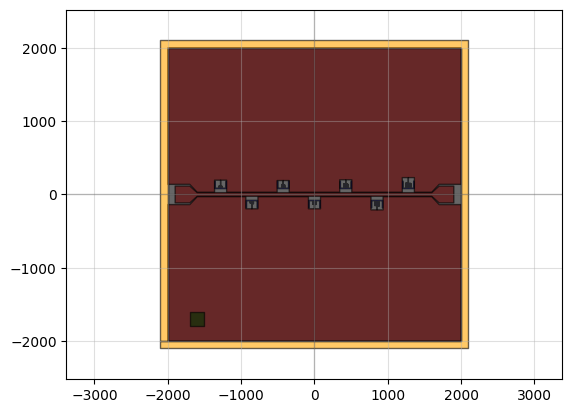

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20250107-SiRes-24pHsq\\20250107-SiRes-24pHsq-v3.gds'

In [26]:
SeparationTlineResonator24 = [0]*7
NumberOfResonators24 = 7

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3, 4, 6,7,8,10,11]# 8, 9, 9, 10, 11, 12, 11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40, 41, 39, 45,  53, 60, 65]
InductorEndLength24 = np.ones(NumberOfResonators24)*([70] + [65] + [50]*4 + [65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24
InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*50
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    # print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)

print('Inductor total length is', InductorTotalLength24)
print('The frequencies are', freqs)

FeedlineLength24  = 3200
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24 + 2*FinalSpacingBondpads24, 4000]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, EdgeResDistanceFactor=0.4)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20250107-SiRes-24pHsq\20250107-SiRes-24pHsq-v3.gds")

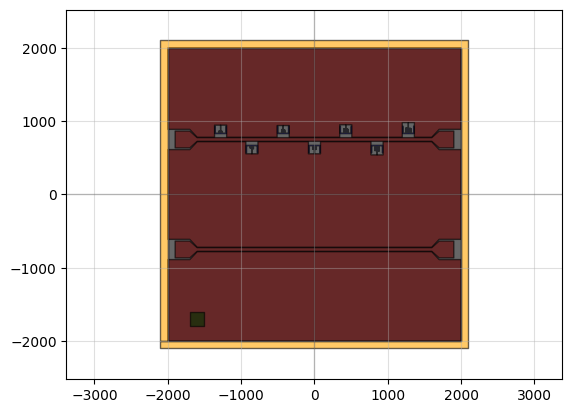

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20250107-SiRes-24pHsq\\20250107-SiRes-24pHsq-v3.gds'

In [31]:
c, metal, chip24 = ChipResonatorsTwoTlines(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24,
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=False, ypos_tlines=[750,-750], EdgeResDistanceFactor=0.4)

qp(chip24)

chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20250107-SiRes-24pHsq\20250107-SiRes-24pHsq-v3.gds")


# Cap sim 61pHsq

In [24]:
# 61pH/sq on Ge!!
FeedlineWidth = 87
FeedlineLength  = 6400
FeedlineGap = 5
FeedlineTaperLength =  100
BondpadWidth =  184
BondpadLength = 200
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.08723025799379 Ohm
Frequency of the feedline is 1.2894756943789032 GHz


In [25]:
BondpadGap

10.574712643678161

In [26]:
chipsize_in = 600
BondpadGap = 10.5747
xsize = chipsize_in*0.001 + 2*BondpadGap*0.001 + 0.05
xsize

0.6711494

1GHz

Inductor total length is [1200.]


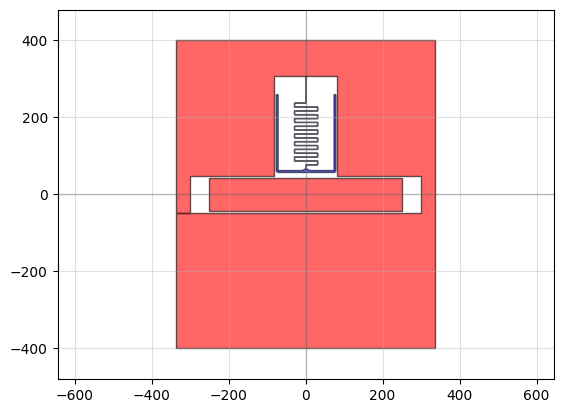

In [18]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*200
CapacitorWidth = np.ones(NumberOfResonators)*5

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[50]
InductorHorizontalLength = np.ones(NumberOfResonators)*[60]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[10]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)


FeedlineLength = 500
ChipSize = [FeedlineLength+100, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True, cap_sim=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-1GHz-Pt-61pHsq_v1-cap.gds")
qp(chip)

Inductor total length is [1200.]


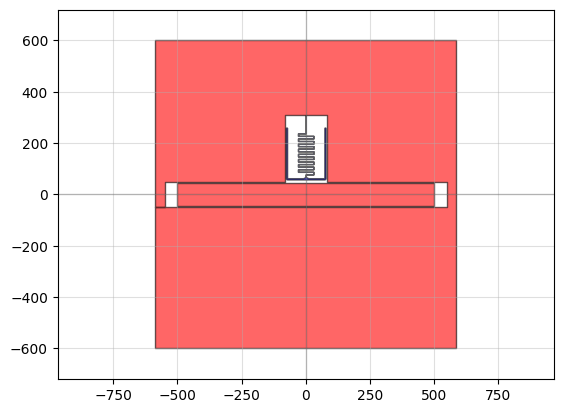

In [19]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*200
CapacitorWidth = np.ones(NumberOfResonators)*5

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[50]
InductorHorizontalLength = np.ones(NumberOfResonators)*[60]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[10]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)


FeedlineLength = 1000
ChipSize = [FeedlineLength+100, 1200]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True, cap_sim=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240717-GeRes-Pt-61pHsq\20240717-1GHz-Pt-61pHsq_v1-cap-bigger.gds")
qp(chip)

In [20]:
0.585575*2

1.17115